# Introduction into how to load the mini-project data and extract individual elements of it <br>
Jonas Braun <br>
jonas.braun@epfl.ch <br>
19.04.2021

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the behavioural data

In [2]:
beh_data_dir = "/mnt/labserver/_Teaching/_2102_BIOENG-456_CoBaR/Week8-Intro-mini-project/Data/COBAR_behaviour.pkl"
beh_df = pd.read_pickle(beh_data_dir)

In [3]:
beh_df

t           twop_index  \
Date   Genotype Fly Trial Frame                                    
210301 J1xCI9   1   0     0        0.005133 -9223372036854775808   
                          1        0.015100 -9223372036854775808   
                          2        0.025100 -9223372036854775808   
                          3        0.035100 -9223372036854775808   
                          4        0.045100 -9223372036854775808   
...                                     ...                  ...   
                    11    25195  251.800000 -9223372036854775808   
                          25196  251.809967 -9223372036854775808   
                          25197  251.819967 -9223372036854775808   
                          25198  251.829967 -9223372036854775808   
                          25199  251.839967 -9223372036854775808   

                                 angle_RF_leg_Coxa_yaw  angle_RF_leg_Coxa  \
Date   Genotype Fly Trial Frame                                             
210301 J1xCI9   1   0     0                   0.288564           0.406265   
                          1                   0.288564           0.406265   
                          2                   0.358618           0.451284   
                          3                   0.358618           0.451284   
                          4                   0.358618           0.451284   
...                                                ...                ...   
                    11    25195               0.358769           0.444905   
                          25196               0.353103           0.469299   
                          25197               0.353103           0.469299   
                          25198               0.353103           0.469299   
                          25199               0.245832           0.504851   

                                 angle_RF_leg_Coxa_roll  angle_RF_leg_Femur  \
Date   Genotype Fly Trial Frame                                               
210301 J1xCI9   1   0     0                   -0.484703           -2.437838   
                          1                   -0.501312           -2.448196   
                          2                   -0.489070           -2.514260   
                          3                   -0.514999           -2.504808   
                          4                   -0.497719           -2.494613   
...                                                 ...                 ...   
                    11    25195               -0.703572           -2.578151   
                          25196               -0.713546           -2.601049   
                          25197               -0.713546           -2.601049   
                          25198               -0.743495           -2.590083   
                          25199               -0.739525           -2.634876   

                                 angle_RF_leg_Tibia  angle_RF_leg_Femur_roll  \
Date   Genotype Fly Trial Frame                                                
210301 J1xCI9   1   0     0                2.119772                -0.070825   
                          1                2.097349                -0.089947   
                          2                2.128461                -0.030327   
                          3                2.093834                -0.056415   
                          4                2.116635                -0.038385   
...                                             ...                      ...   
                    11    25195            2.220802                -0.021502   
                          25196            2.245679                -0.019357   
                          25197            2.298148                -0.020857   
                          25198            2.235951                -0.029271   
                          25199            2.185196                -0.055439   

                                 angle_RF_leg_Tarsus  angle_RM_leg_Coxa_yaw  \
Date   

You can see that this is quite a big dataset, but how big is it actually? <br>
Get the size with the .shape attribute:

In [4]:
beh_df.shape

(302400, 143)

we have 302400 rows (=time points) and 143 columns (individual variables of the data).<br>
We'll try to select specific elements of the data lateron, but let's first look at all the data we have: <br>
We have 143 different variables including <br>
- the time 't', relative to the beginning of a trial. This will be usefull to synchronise behavioural and neuronal data
- the corresponding index in two photon data: 'data twop_index'
- 42 different leg joint angles, 7 per leg, for example 'angle_RF_leg_Coxa_yaw'
    - there are 7 joint angles per leg: Coxa, Coxa_yaw, Coxa_roll, Femur, Femur_roll, Tibia, Tarsus
    - if there is no _yaw or _roll, the angle is the 'pitch'
- 90 different leg joint positions, each in x,y, and z, for example 'joint_LH_leg_Claw_z'
    - there are 90/3/6=5 joints that are tracked per leg: Coxa, Femur, Tibia, Tarsus, and Claw
- The output of the behavioural classifier: 
    - 'Prediction' is the behaviour that the classifier predicts for the current frame
    - 'Entropy' is the entropy of the classification output. The higher it is, the more uncertain the classifier is with this frame.
    - 'Probability abdominal_grooming'/ antennal_grooming / eye_grooming / foreleg_grooming / hindleg_grooming / resting / walking gives the probability of each of the behaviours that the classifier was trained on

You might want to know what the names of all the columns are? <br>
Try this: <br>
(use the bottom command if you actually want to see all of them)

In [6]:
# beh_df.columns
list(beh_df.columns)

['t',
 'twop_index',
 'angle_RF_leg_Coxa_yaw',
 'angle_RF_leg_Coxa',
 'angle_RF_leg_Coxa_roll',
 'angle_RF_leg_Femur',
 'angle_RF_leg_Tibia',
 'angle_RF_leg_Femur_roll',
 'angle_RF_leg_Tarsus',
 'angle_RM_leg_Coxa_yaw',
 'angle_RM_leg_Coxa',
 'angle_RM_leg_Coxa_roll',
 'angle_RM_leg_Femur',
 'angle_RM_leg_Tibia',
 'angle_RM_leg_Femur_roll',
 'angle_RM_leg_Tarsus',
 'angle_RH_leg_Coxa_yaw',
 'angle_RH_leg_Coxa',
 'angle_RH_leg_Coxa_roll',
 'angle_RH_leg_Femur',
 'angle_RH_leg_Tibia',
 'angle_RH_leg_Femur_roll',
 'angle_RH_leg_Tarsus',
 'angle_LF_leg_Coxa_yaw',
 'angle_LF_leg_Coxa',
 'angle_LF_leg_Coxa_roll',
 'angle_LF_leg_Femur',
 'angle_LF_leg_Tibia',
 'angle_LF_leg_Femur_roll',
 'angle_LF_leg_Tarsus',
 'angle_LM_leg_Coxa_yaw',
 'angle_LM_leg_Coxa',
 'angle_LM_leg_Coxa_roll',
 'angle_LM_leg_Femur',
 'angle_LM_leg_Tibia',
 'angle_LM_leg_Femur_roll',
 'angle_LM_leg_Tarsus',
 'angle_LH_leg_Coxa_yaw',
 'angle_LH_leg_Coxa',
 'angle_LH_leg_Coxa_roll',
 'angle_LH_leg_Femur',
 'angle_LH_leg_T

### How many trials do we have in the data? <br>
let's try to get the index of the dataframe first:

In [7]:
beh_df.index

MultiIndex([(210301, 'J1xCI9', 1,  0,     0),
            (210301, 'J1xCI9', 1,  0,     1),
            (210301, 'J1xCI9', 1,  0,     2),
            (210301, 'J1xCI9', 1,  0,     3),
            (210301, 'J1xCI9', 1,  0,     4),
            (210301, 'J1xCI9', 1,  0,     5),
            (210301, 'J1xCI9', 1,  0,     6),
            (210301, 'J1xCI9', 1,  0,     7),
            (210301, 'J1xCI9', 1,  0,     8),
            (210301, 'J1xCI9', 1,  0,     9),
            ...
            (210301, 'J1xCI9', 1, 11, 25190),
            (210301, 'J1xCI9', 1, 11, 25191),
            (210301, 'J1xCI9', 1, 11, 25192),
            (210301, 'J1xCI9', 1, 11, 25193),
            (210301, 'J1xCI9', 1, 11, 25194),
            (210301, 'J1xCI9', 1, 11, 25195),
            (210301, 'J1xCI9', 1, 11, 25196),
            (210301, 'J1xCI9', 1, 11, 25197),
            (210301, 'J1xCI9', 1, 11, 25198),
            (210301, 'J1xCI9', 1, 11, 25199)],
           names=['Date', 'Genotype', 'Fly', 'Trial', 'Frame'],

You can see we used a MultiIndex to create this pandas DataFrame. <br>
This means you can use multiple methods to index your data, here we mostly care about the Trial and the Frame.  <br>
So, how many trials do we have? <br>
First, we only select the "Trial" index, then we see how many unique values it has:

In [8]:
trial_index = beh_df.index.get_level_values("Trial")
trial_index

Int64Index([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
            ...
            11, 11, 11, 11, 11, 11, 11, 11, 11, 11],
           dtype='int64', name='Trial', length=302400)

In [9]:
print("all indices used: ", np.unique(trial_index))
print("number of indices: ", len(np.unique(trial_index)))

all indices used:  [ 0  1  2  3  4  5  6  7  8  9 10 11]
number of indices:  12


# Acessing individual features of the data

## get data from a specific trial <br>
The dataframe uses a multi-index of [Date, Genotype, Fly, Trial, Frame]. <br>
Each of these indices holds information about each data point. Here, mostly Trial and Frame are important, because we are analysing data from one fly only. <br>
To get data from the trial number 5, we are going to make use of the multi-index:

In [10]:
beh_df_trial_5 = beh_df[beh_df.index.get_level_values("Trial")==5]
beh_df_trial_5

t           twop_index  \
Date   Genotype Fly Trial Frame                                    
210301 J1xCI9   1   5     0        0.000133 -9223372036854775808   
                          1        0.010133 -9223372036854775808   
                          2        0.020133 -9223372036854775808   
                          3        0.030133 -9223372036854775808   
                          4        0.040133 -9223372036854775808   
...                                     ...                  ...   
                          25195  251.794500 -9223372036854775808   
                          25196  251.804500 -9223372036854775808   
                          25197  251.814500 -9223372036854775808   
                          25198  251.824500 -9223372036854775808   
                          25199  251.834467 -9223372036854775808   

                                 angle_RF_leg_Coxa_yaw  angle_RF_leg_Coxa  \
Date   Genotype Fly Trial Frame                                             
210301 J1xCI9   1   5     0                   0.345735           0.418903   
                          1                   0.345735           0.418903   
                          2                   0.345735           0.418903   
                          3                   0.345735           0.418903   
                          4                   0.345735           0.418903   
...                                                ...                ...   
                          25195               0.428208           0.375699   
                          25196               0.457501           0.395483   
                          25197               0.457501           0.395483   
                          25198               0.428208           0.375699   
                          25199               0.457501           0.395483   

                                 angle_RF_leg_Coxa_roll  angle_RF_leg_Femur  \
Date   Genotype Fly Trial Frame                                               
210301 J1xCI9   1   5     0                   -0.430634           -2.228500   
                          1                   -0.428804           -2.249327   
                          2                   -0.430634           -2.228500   
                          3                   -0.430634           -2.228500   
                          4                   -0.428804           -2.249327   
...                                                 ...                 ...   
                          25195               -0.297973           -2.071966   
                          25196               -0.308317           -2.076785   
                          25197               -0.302689           -2.095646   
                          25198               -0.292721           -2.090990   
                          25199               -0.302689           -2.095646   

                                 angle_RF_leg_Tibia  angle_RF_leg_Femur_roll  \
Date   Genotype Fly Trial Frame                                                
210301 J1xCI9   1   5     0                1.457544                -0.020670   
                          1                1.483006                -0.021579   
                          2                1.457544                -0.020670   
                          3                1.457544                -0.020670   
                          4                1.483006                -0.021579   
...                                             ...                      ...   
                          25195            1.515952                -0.030194   
                          25196            1.499208                -0.037308   
                          25197            1.518699                -0.036264   
                          25198            1.535437                -0.031268   
                          25199            1.518699                -0.036264   

                                 angle_RF_leg_Tarsus  angle_RM_leg_Coxa_yaw  \
Date   

## get data from one column only = one time series <br>
Often, you want to analyse a particular time series, for example the right front leg roll angle: angle_RF_leg_Coxa_roll <br>
You can get this data by aressing one column only:

In [11]:
angle_RF_leg_roll = beh_df["angle_RF_leg_Coxa_roll"]
angle_RF_leg_roll

Date    Genotype  Fly  Trial  Frame
210301  J1xCI9    1    0      0       -0.484703
                              1       -0.501312
                              2       -0.489070
                              3       -0.514999
                              4       -0.497719
                                         ...   
                       11     25195   -0.703572
                              25196   -0.713546
                              25197   -0.713546
                              25198   -0.743495
                              25199   -0.739525
Name: angle_RF_leg_Coxa_roll, Length: 302400, dtype: float64

Alternatively, you might want to get the data from all joint angles <br>
Try the following: <br>
(you can also try with "joints" for example)

In [12]:
beh_df.filter(regex="angle")

angle_RF_leg_Coxa_yaw  angle_RF_leg_Coxa  \
Date   Genotype Fly Trial Frame                                             
210301 J1xCI9   1   0     0                   0.288564           0.406265   
                          1                   0.288564           0.406265   
                          2                   0.358618           0.451284   
                          3                   0.358618           0.451284   
                          4                   0.358618           0.451284   
...                                                ...                ...   
                    11    25195               0.358769           0.444905   
                          25196               0.353103           0.469299   
                          25197               0.353103           0.469299   
                          25198               0.353103           0.469299   
                          25199               0.245832           0.504851   

                                 angle_RF_leg_Coxa_roll  angle_RF_leg_Femur  \
Date   Genotype Fly Trial Frame                                               
210301 J1xCI9   1   0     0                   -0.484703           -2.437838   
                          1                   -0.501312           -2.448196   
                          2                   -0.489070           -2.514260   
                          3                   -0.514999           -2.504808   
                          4                   -0.497719           -2.494613   
...                                                 ...                 ...   
                    11    25195               -0.703572           -2.578151   
                          25196               -0.713546           -2.601049   
                          25197               -0.713546           -2.601049   
                          25198               -0.743495           -2.590083   
                          25199               -0.739525           -2.634876   

                                 angle_RF_leg_Tibia  angle_RF_leg_Femur_roll  \
Date   Genotype Fly Trial Frame                                                
210301 J1xCI9   1   0     0                2.119772                -0.070825   
                          1                2.097349                -0.089947   
                          2                2.128461                -0.030327   
                          3                2.093834                -0.056415   
                          4                2.116635                -0.038385   
...                                             ...                      ...   
                    11    25195            2.220802                -0.021502   
                          25196            2.245679                -0.019357   
                          25197            2.298148                -0.020857   
                          25198            2.235951                -0.029271   
                          25199            2.185196                -0.055439   

                                 angle_RF_leg_Tarsus  angle_RM_leg_Coxa_yaw  \
Date   Genotype Fly Trial Frame                                               
210301 J1xCI9   1   0     0                -0.734916               0.109117   
                          1                -0.708117               0.109117   
                          2                -0.725136               0.109117   
                          3                -0.708117               0.109117   
                          4                -0.734916               0.109117   
...                                              ...                    ...   
                    11    25195            -0.711354              -0.041018   
                          25196            -0.764936              -0.037530   
                          25197            -0.917106              -0.032585   
                          25198            -0.838624              -0.029114   
              

you might notice, that this still gives you the multi-index consisting of [Date, Genotype, Fly, Trial, Frame] <br>
If you want just the actual data values, do:

In [13]:
angle_RF_leg_roll = beh_df["angle_RF_leg_Coxa_roll"].values
angle_RF_leg_roll

array([-0.48470347, -0.50131216, -0.48907004, ..., -0.71354553,
       -0.74349507, -0.73952544])

In [14]:
angle_RF_leg_roll.shape

(302400,)

### if you prefer to work with Numpy arrays, you can easily convert the values into a numpy array:

In [15]:
beh_df["angle_RF_leg_Coxa_roll"].to_numpy()

array([-0.48470347, -0.50131216, -0.48907004, ..., -0.71354553,
       -0.74349507, -0.73952544])

Now, this gave you the values of all trials, so let's combine the two previous steps to get angle_RF_leg_roll only from trial 5

In [16]:
angle_RF_leg_roll_trial_5 = beh_df[beh_df.index.get_level_values("Trial")==5]["angle_RF_leg_Coxa_roll"].values
angle_RF_leg_roll_trial_5

array([-0.43063373, -0.42880391, -0.43063373, ..., -0.30268906,
       -0.29272074, -0.30268906])

## how long is one trial?

In [17]:
len(beh_df_trial_5)

25200

so one trial is 25200 samples long, but how much is that in time?

In [18]:
beh_df_trial_5["t"].iloc[-1] - beh_df_trial_5["t"].iloc[0]

251.83433333333335

here, we located the last and the first sample of the "t" column and subtracted it, so that we have the total time

## how many two photon frames did we have during the recording of one trial? <br>
Remember, that we have the "twop_index" column to help us with that, so let's look at it:

In [19]:
beh_df_trial_5["twop_index"].values[:200]

array([-9223372036854775808, -9223372036854775808, -9223372036854775808,
       -9223372036854775808, -9223372036854775808, -9223372036854775808,
       -9223372036854775808, -9223372036854775808, -9223372036854775808,
       -9223372036854775808, -9223372036854775808, -9223372036854775808,
       -9223372036854775808, -9223372036854775808, -9223372036854775808,
       -9223372036854775808, -9223372036854775808, -9223372036854775808,
       -9223372036854775808, -9223372036854775808, -9223372036854775808,
       -9223372036854775808, -9223372036854775808, -9223372036854775808,
       -9223372036854775808, -9223372036854775808, -9223372036854775808,
       -9223372036854775808, -9223372036854775808, -9223372036854775808,
       -9223372036854775808, -9223372036854775808, -9223372036854775808,
       -9223372036854775808, -9223372036854775808, -9223372036854775808,
       -9223372036854775808, -9223372036854775808, -9223372036854775808,
       -9223372036854775808, -9223372036854775808, 

The code above prints the first 200 values. <br>
you probably noticed, that there is some weird values in the beginning before it starts with 0, 1, ... <br>
(This is also the case for the end of the trial) <br>
This is the case, because there are no corresponding two photon data frames for these behavioural frames. <br>
So let's look at the remaining ones:

In [20]:
twop_index = beh_df_trial_5["twop_index"].to_numpy()

In [21]:
twop_index[twop_index >= 0]

array([   0,    0,    0, ..., 4039, 4039, 4039])

In [22]:
print("all existing two indices: ", np.unique(twop_index[twop_index >= 0]))
print("number of twop frames: ", len(np.unique(twop_index[twop_index >= 0])))

all existing two indices:  [   0    1    2 ... 4037 4038 4039]
number of twop frames:  4040


# loading two photon neuronal data

In [23]:
neural_data_dir = beh_data_dir = "/mnt/labserver/_Teaching/_2102_BIOENG-456_CoBaR/Week8-Intro-mini-project/Data/COBAR_neural.pkl"
neural_df = pd.read_pickle(neural_data_dir)

In [24]:
neural_df

t     neuron_0    neuron_1  \
Date   Genotype Fly Trial Frame                                        
210301 J1xCI9   1   0     0        1.846767   886.468822  539.078854   
                          1        1.908333   904.990346  549.142576   
                          2        1.969900   951.343444  495.389359   
                          3        2.031467   919.118001  488.734655   
                          4        2.093000   811.207176  598.854688   
...                                     ...          ...         ...   
                    11    4035   250.257500  1091.733025  229.036370   
                          4036   250.319067  1083.689512  224.277678   
                          4037   250.380600  1016.800708  263.032693   
                          4038   250.442167  1100.966747  217.181669   
                          4039   250.503733  1127.533714  211.338355   

                                    neuron_2     neuron_3     neuron_4  \
Date   Genotype Fly Trial Frame                                          
210301 J1xCI9   1   0     0       648.448219   659.934798   960.886917   
                          1       641.978012   673.451323   959.120909   
                          2       667.900427   647.023920   922.999666   
                          3       627.207506   669.359604   967.324279   
                          4       598.844883   614.788711   927.682820   
...                                      ...          ...          ...   
                    11    4035   1673.098351  2788.830860  1832.827041   
                          4036   1626.795243  2803.103042  1869.423843   
                          4037   1624.789506  2755.284855  1924.012693   
                          4038   1569.018839  2890.244587  1921.096732   
                          4039   1718.190280  2731.183736  2022.781228   

                                    neuron_5     neuron_6     neuron_7  \
Date   Genotype Fly Trial Frame                                          
210301 J1xCI9   1   0     0      1087.578005  1264.055465   689.275322   
                          1      1033.622170  1293.954485   647.848768   
                          2      1035.334534  1298.692514   668.630966   
                          3      1081.832837  1320.492280   697.383989   
                          4      1015.316407  1274.834253   679.311958   
...                                      ...          ...          ...   
                    11    4035   1548.782680  1388.706244  2238.306798   
                          4036   1675.233107  1604.436872  2281.367960   
                          4037   1810.982975  1496.055076  2359.644688   
                          4038   1735.650159  1389.671633  2330.835800   
                          4039   1826.932777  1474.406872  2223.860182   

                                    neuron_8  ...   neuron_113   neuron_114  \
Date   Genotype Fly Trial Frame               ...                             
210301 J1xCI9   1   0     0      1297.684359  ...  1434.945788  1039.457277   
                          1      1253.930092  ...  1432.954386  1032.438934   
                          2      1285.729967  ...  1358.161531   974.769252   
                          3      1255.667939  ...  1386.650784  1004.453438   
                          4      1241.864999  ...  1352.036969   972.731774   
...                                      ...  ...          ...          ...   
                    11    4035   2029.408911  ...   887.114691  1734.396430   
                          4036   2128.465504  ...  1002.946415  1733.634185   
                          4037   2044.958695  ...  1064.565073  1804.522860   
                          4038   2068.464632  ...  1058.037690  1807.967783   
                          4039   1991.379295  ...  1080.679242  1871.425640   

                                  neuron_115   neuron_116  neuron_117  \
Date   Genotype Fly Trial Frame                                         
21030

you can see we use the same MultiIndex indexing method here, so all of what we have learned above, can be used for the neural data as well. <br>
We also have the following: <br>
- again, the time "t" relative to the beginning of the trials as variable
- the fluorescence signals of the neurons: "neuron_0" ... "neuron_XX" <br>

Let's confirm here, that we have as many time points as we have two photon frames (4040). <br>
We'll again get one trial and see how long it is:

In [25]:
neural_df_trial_5 = neural_df[neural_df.index.get_level_values("Trial")==5]
neural_df_trial_5

t     neuron_0     neuron_1  \
Date   Genotype Fly Trial Frame                                         
210301 J1xCI9   1   5     0        1.846867  1809.386126   665.774282   
                          1        1.908433  1801.339694   662.483202   
                          2        1.970000  1943.043781   619.011063   
                          3        2.031567  1870.714405   687.897894   
                          4        2.093133  1966.339448   634.753188   
...                                     ...          ...          ...   
                          4035   250.247367  1353.747429  1016.511913   
                          4036   250.308933  1288.594450  1083.962850   
                          4037   250.370500  1383.358800  1102.880014   
                          4038   250.432033  1432.264362  1133.432191   
                          4039   250.493600  1383.804169  1101.031508   

                                    neuron_2     neuron_3     neuron_4  \
Date   Genotype Fly Trial Frame                                          
210301 J1xCI9   1   5     0      1188.202924  1541.938104  2150.237761   
                          1      1271.954732  1617.990076  2306.943888   
                          2      1194.355135  1756.716551  2297.126131   
                          3      1246.431739  1862.391912  2135.716074   
                          4      1378.615861  1912.839871  2156.252130   
...                                      ...          ...          ...   
                          4035    773.770616   843.762165  1817.232686   
                          4036    832.978996   926.441556  1827.030744   
                          4037    834.502175   915.146898  1706.611453   
                          4038    792.668603   943.147912  1808.297019   
                          4039    755.500365   941.959892  1751.537473   

                                    neuron_5     neuron_6     neuron_7  \
Date   Genotype Fly Trial Frame                                          
210301 J1xCI9   1   5     0      2329.850372  1729.639696  1711.952669   
                          1      2178.153891  1918.933594  1945.351842   
                          2      2300.120152  1882.551740  2053.951521   
                          3      2266.849542  1809.732424  2316.585786   
                          4      2245.102240  1919.101261  2311.235105   
...                                      ...          ...          ...   
                          4035   1788.157795  1797.351151  1349.495806   
                          4036   1881.033931  1613.666990  1263.722829   
                          4037   1868.815083  1745.850608  1279.552124   
                          4038   1876.446481  1841.611468  1343.109172   
                          4039   1854.161781  1767.382145  1305.077345   

                                    neuron_8  ...   neuron_113   neuron_114  \
Date   Genotype Fly Trial Frame               ...                             
210301 J1xCI9   1   5     0      1828.928150  ...   977.630663  1452.995257   
                          1      1811.082846  ...  1023.912243  1465.481287   
                          2      1889.094201  ...  1059.028273  1369.348770   
                          3      1979.014751  ...  1036.218241  1418.750396   
                          4      1815.103752  ...  1063.408491  1508.200679   
...                                      ...  ...          ...          ...   
                          4035   1379.157842  ...   930.009848  1147.447425   
                          4036   1435.566279  ...   973.359533  1237.778533   
                          4037   1484.309944  ...   998.319449  1183.911668   
                          4038   1443.689583  ...   988.530347  1130.531951   
                          4039   1407.747667  ...   966.401524  1153.124609   

                                  neuron_115   neuron_116  neuron_117  \
Date   Genotype Fly Trial Frame                                  

In [26]:
print(len(neural_df_trial_5))

4040


## How do we get all the neuronal signals? <br>
Remember how to filter specific columns? <br>
Let's try that with the keyword "neuron":

In [27]:
neural_signals = neural_df.filter(regex="neuron")
neural_signals

neuron_0    neuron_1     neuron_2  \
Date   Genotype Fly Trial Frame                                         
210301 J1xCI9   1   0     0       886.468822  539.078854   648.448219   
                          1       904.990346  549.142576   641.978012   
                          2       951.343444  495.389359   667.900427   
                          3       919.118001  488.734655   627.207506   
                          4       811.207176  598.854688   598.844883   
...                                      ...         ...          ...   
                    11    4035   1091.733025  229.036370  1673.098351   
                          4036   1083.689512  224.277678  1626.795243   
                          4037   1016.800708  263.032693  1624.789506   
                          4038   1100.966747  217.181669  1569.018839   
                          4039   1127.533714  211.338355  1718.190280   

                                    neuron_3     neuron_4     neuron_5  \
Date   Genotype Fly Trial Frame                                          
210301 J1xCI9   1   0     0       659.934798   960.886917  1087.578005   
                          1       673.451323   959.120909  1033.622170   
                          2       647.023920   922.999666  1035.334534   
                          3       669.359604   967.324279  1081.832837   
                          4       614.788711   927.682820  1015.316407   
...                                      ...          ...          ...   
                    11    4035   2788.830860  1832.827041  1548.782680   
                          4036   2803.103042  1869.423843  1675.233107   
                          4037   2755.284855  1924.012693  1810.982975   
                          4038   2890.244587  1921.096732  1735.650159   
                          4039   2731.183736  2022.781228  1826.932777   

                                    neuron_6     neuron_7     neuron_8  \
Date   Genotype Fly Trial Frame                                          
210301 J1xCI9   1   0     0      1264.055465   689.275322  1297.684359   
                          1      1293.954485   647.848768  1253.930092   
                          2      1298.692514   668.630966  1285.729967   
                          3      1320.492280   697.383989  1255.667939   
                          4      1274.834253   679.311958  1241.864999   
...                                      ...          ...          ...   
                    11    4035   1388.706244  2238.306798  2029.408911   
                          4036   1604.436872  2281.367960  2128.465504   
                          4037   1496.055076  2359.644688  2044.958695   
                          4038   1389.671633  2330.835800  2068.464632   
                          4039   1474.406872  2223.860182  1991.379295   

                                    neuron_9  ...   neuron_113   neuron_114  \
Date   Genotype Fly Trial Frame               ...                             
210301 J1xCI9   1   0     0      1277.400313  ...  1434.945788  1039.457277   
                          1      1267.892686  ...  1432.954386  1032.438934   
                          2      1239.955667  ...  1358.161531   974.769252   
                          3      1242.958330  ...  1386.650784  1004.453438   
                          4      1272.199635  ...  1352.036969   972.731774   
...                                      ...  ...          ...          ...   
                    11    4035   1444.498996  ...   887.114691  1734.396430   
                          4036   1316.480683  ...  1002.946415  1733.634185   
                          4037   1306.410691  ...  1064.565073  1804.522860   
                          4038   1246.572084  ...  1058.037690  1807.967783   
                          4039   1435.272440  ...  1080.679242  1871.425640   

                                  neuron_115   neuron_116  neuron_117  \
Date   Genotype Fly Trial Frame                            

Now, if you want one trial of neural signals in numpy array format, I'm sure you remember how to do this from above:

In [28]:
neural_signals_trial_5 = neural_df[neural_df.index.get_level_values("Trial")==5].filter(regex="neuron").to_numpy()
print("Values of neural signals in trial 5: ", neural_signals_trial_5)


Values of neural signals in trial 5:  [[1809.38612584  665.77428203 1188.20292446 ...  570.7764357
  1980.65119778 1445.31977938]
 [1801.33969428  662.48320163 1271.95473184 ...  583.63972504
  2110.81825225 1244.3440913 ]
 [1943.04378089  619.01106293 1194.35513493 ...  517.64149257
  2232.64194535 1275.79260378]
 ...
 [1383.35879953 1102.8800136   834.50217484 ...  549.95008508
  1496.04258261 1378.91475755]
 [1432.26436195 1133.43219119  792.66860277 ...  511.13737208
  1679.85824398 1357.69318997]
 [1383.80416932 1101.03150784  755.50036497 ...  474.40926314
  1587.30371841 1379.48705307]]


# some very basic numpy analysis
Numpy is an array manipulation library and hosts a lot of mathematical functions that will be usefull in this project. <br>
Here are some examples: <br>
- np.mean(array, axis=(0,1)) --> to compute the mean along the 0th and 1st dimension
- np.std(array, axis=(0,1)) --> to compute the standard deviation
- np.max(), np.min() --> compute the minimum/maximum of an array
- np.quantile(array, 0.95) --> compute the 95% quantile of the data. Often usefull for getting a robust estimation of the maximum
- ...

<br>
Often we start by declaring a numpy array: <br>
array = np.array([[0, 1, 2], [3, 4, 5]]) <br>
or <br>
array_zeros = np.zeros((2,3)) <br>
or <br>
array_ones = np.ones_like(array_zeros) <br>

We can get the shape of an array easily: <br>
array.shape



### Let's try some of this with our data:

In [29]:
print("Shape of neural signals in trial 5: ", neural_signals_trial_5.shape)

Shape of neural signals in trial 5:  (4040, 123)


## What are the minimum, maximum, mean, standard deviation, 95% quantile, median of neuron # 7? <br>
This will also give you an example of indexing: <br>
We want neuron 7 and all its values across time:

In [30]:
neuron_7 = neural_signals_trial_5[:, 7]
print("Mean: ", np.mean(neuron_7))
print("Median: ", np.median(neuron_7))
print("Standard deviation: ", np.std(neuron_7))
print("Minimum: ", np.min(neuron_7))
print("Maximum: ", np.max(neuron_7))
print("95% quantile: ", np.quantile(neuron_7, 0.95))

Mean:  1965.9932231015882
Median:  1776.3468079858897
Standard deviation:  955.1879610320244
Minimum:  754.8114381128428
Maximum:  5084.989138233418
95% quantile:  4040.737194076848


## Now let's plot that neuron, but we'll see more on that in another notebook:

In [31]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


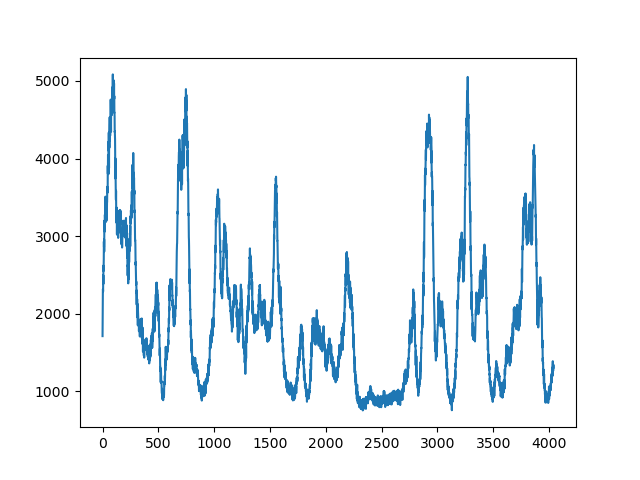

In [32]:
%matplotlib notebook
# --> this makes the plot interactive
plt.plot(neuron_7)